<a href="https://colab.research.google.com/github/reddy-bhavesh/ATFL-Detect/blob/main/ATFL_dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Datasets successfully saved


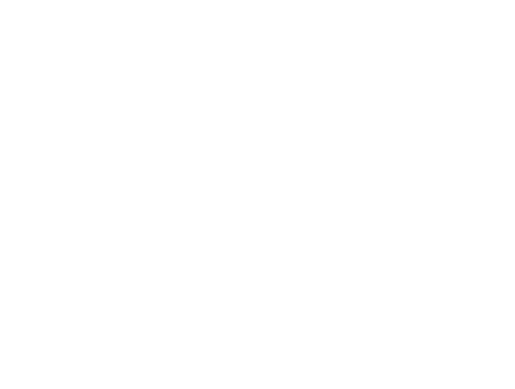

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# Ensure the dataset directory exists
if not os.path.exists('content/drive/MyDrive/dataset1'):
    os.mkdir('/content/drive/My Drive/ATFL_dataset')

# Create directories for new dataset
os.mkdir('/content/drive/My Drive/ATFL_new_dataset')
os.mkdir('/content/drive/My Drive/ATFL_new_dataset/images')

# Paths for training, validation, and test images
train_paths = {
    'normal': '/content/drive/MyDrive/dataset1/train/normal',
    'abnormal': '/content/drive/MyDrive/dataset1/train/abnormal'
}

val_paths = {
    'normal': '/content/drive/MyDrive/dataset1/validation/normal',
    'abnormal': '/content/drive/MyDrive/dataset1/validation/abnormal'
}

test_paths = {
    'normal': '/content/drive/MyDrive/dataset1/test/normal',
    'abnormal': '/content/drive/MyDrive/dataset1/test/abnormal'
}

# Function to process and save images
def process_and_save_images(paths, label, set_name):
    labels = []
    i = 1
    for category, path in paths.items():
        for filename in os.listdir(path):
            if filename.endswith(".png"):
                img = cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img = cv2.resize(img, (512, 512))
                labels.append(label[category])
                plt.axis('off')
                plt.imsave(f"/content/drive/My Drive/ATFL_new_dataset/images/{set_name}_{i}.jpg", img, cmap='gray')
                i += 1
    return labels

# Labels for normal and abnormal
label_dict = {'normal': 0, 'abnormal': 1}

# Process and save training images
train_labels = process_and_save_images(train_paths, label_dict, 'train')

# Process and save validation images
val_labels = process_and_save_images(val_paths, label_dict, 'val')

# Process and save test images
test_labels = process_and_save_images(test_paths, label_dict, 'test')

# Save labels to pickle files
with open("/content/drive/My Drive/ATFL_new_dataset/train_labels.pickle", "wb") as f:
    pickle.dump(train_labels, f)

with open("/content/drive/My Drive/ATFL_new_dataset/val_labels.pickle", "wb") as f:
    pickle.dump(val_labels, f)

with open("/content/drive/My Drive/ATFL_new_dataset/test_labels.pickle", "wb") as f:
    pickle.dump(test_labels, f)

# Create training, validation, and test datasets
def create_dataset(set_name, labels):
    dataset = []
    for i in range(1, len(labels) + 1):
        img = cv2.imread(f"/content/drive/My Drive/ATFL_new_dataset/images/{set_name}_{i}.png", cv2.IMREAD_COLOR)
        img = cv2.resize(img, (512, 512))
        label = labels[i-1]
        dataset.append([img, label])
    return dataset

# Load datasets
train_data = create_dataset('train', train_labels)
val_data = create_dataset('val', val_labels)
test_data = create_dataset('test', test_labels)

# Save datasets to pickle files
with open("/content/drive/My Drive/ATFL_new_dataset/train_data.pickle", "wb") as f:
    pickle.dump(train_data, f)

with open("/content/drive/My Drive/ATFL_new_dataset/val_data.pickle", "wb") as f:
    pickle.dump(val_data, f)

with open("/content/drive/My Drive/ATFL_new_dataset/test_data.pickle", "wb") as f:
    pickle.dump(test_data, f)

print("Datasets successfully saved")
